# Spots and Observed Luminosity Spreads

Role of short-timescale spots in driving observed luminosity spreads in young clusters, OB associations, and moving groups.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [2]:
cd /Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts/

/Users/grefe950/Projects/starspot/models/age_120.0+z_0.00/sts


In [3]:
# routine to load a compressed isochrones
def loadIsochrone(filename):
    iso = np.genfromtxt(filename)
    bools = [x[0] < 1.65 for x in iso]
    return np.compress(bools, iso, axis=0)

Starting with the isochrone used throughout other examples, that of a 120 Myr cluster (approx. Pleiades age).

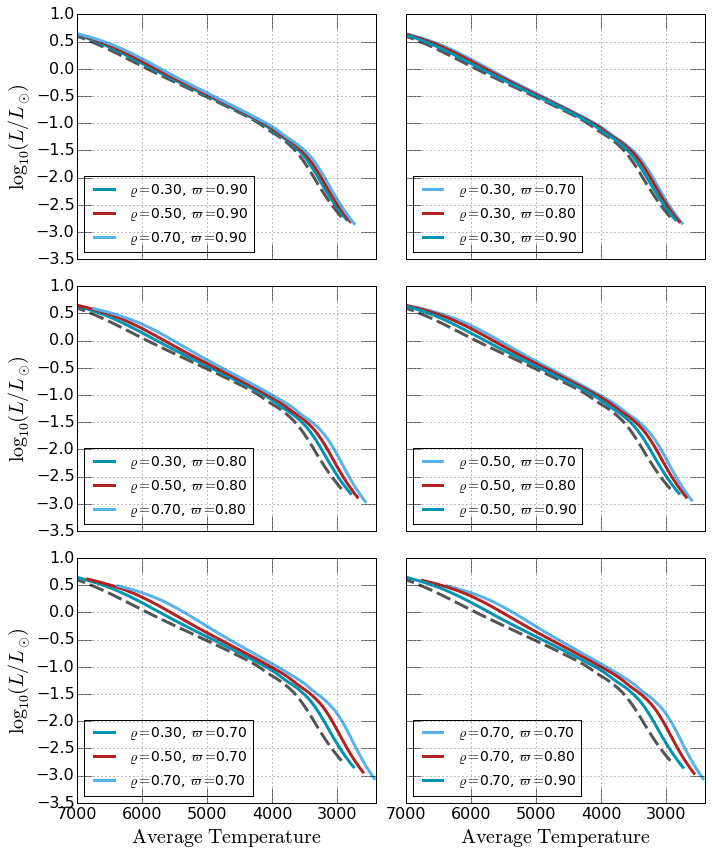

In [10]:
colors = {2:'#0094b2', 1:'#B22222', 0:'#56b4ea', 3:'#555555'}
varpi  = np.array([0.7, 0.8, 0.9])
varrho = np.array([0.3, 0.5, 0.7])

fig, ax = plt.subplots(3, 2, figsize=(10., 12.), sharex=True, sharey=True)
    
# set x-axis labels
for i in range(2):
    ax[2, i].set_xlim(7000., 2400.)
    #ax[2, i].set_ylim(0.1, 3.6)
    ax[2, i].set_xlabel('${\\rm Average\\ Temperature}$', fontsize=20.)

# load standard isochrone
iso = loadIsochrone('../isochrone_120.0myr_z+0.00_a+0.00_marcs.iso')

# initial Li abundance
Li_init = np.array([[3000., 3.3], [8000., 3.3]])

# left column, vary rho
for i in range(3):
    ax[i, 0].tick_params(which='major', axis='both', length=15., labelsize=16.)
    ax[i, 0].set_ylabel('$\\log_{10}(L / L_{\\odot})$', fontsize=20.)
    
    ax[i, 0].plot(10**iso[:,1], iso[:,3], lw=3, dashes=(15., 5.), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho*(1.0 - varpi[2-i]**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[j], varpi[2-i])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[j], varpi[2-i])
        spot_iso = loadIsochrone(filename)
        ax[i, 0].plot(10**spot_iso[:, 1], spot_iso[:, 3], lw=3, c=colors[2-j], label=line)
        
    ax[i, 0].legend(loc=3, fontsize=14.)
    ax[i, 0].grid(True)

# left column, vary varpi
for i in range(3):
    ax[i, 1].tick_params(which='major', axis='both', length=15., labelsize=16.)    
    ax[i, 1].plot(10**iso[:,1], iso[:,3], lw=3, dashes=(15., 5.), c=colors[3])
    
    # compute zeta for (varpi, varrho); plot spotted isochrone
    zeta   = 1.0 - varrho[i]*(1.0 - varpi**4)
    for j in range(len(zeta)):
        filename = 'mag_zet{:+4.2f}_eps+1.00_rho{:+4.2f}_pi{:+4.2f}.dat'.format(zeta[j], varrho[i], varpi[j])
        line = '$\\varrho = ${:4.2f}, $\\varpi = ${:4.2f}'.format(varrho[i], varpi[j])
        spot_iso = loadIsochrone(filename)
        ax[i, 1].plot(10**spot_iso[:, 1], spot_iso[:, 3], lw=3, c=colors[j], label=line)
        
    ax[i, 1].legend(loc=3, fontsize=14.)
    ax[i, 1].grid(True)
    
fig.tight_layout()

Now we can move to younger clusters. Starting with 5 Myr.